In [1]:
# importing libraries
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(io = file)

In [2]:
# Looking at the top 5 observations
chef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,4398.0,0,Abelar Hightower,abelar.hightower@me.com,Abelar,Hightower,172,6,8,6,109.42,1,2,1,1,6,2,0,4,9,0,0,241.8,7,1,4,9,651
1,813.0,1,Addam Marbrand,addam.marbrand@mmm.com,Addam,Marbrand,15,3,11,8,53.20,1,0,0,1,5,1,42,0,2,1,0,80.8,4,0,2,15,0
2,880.0,1,Addam Velaryon,addam.velaryon@goldmansacs.com,Addam,Velaryon,14,6,12,2,138.78,1,1,0,0,6,1,16,0,1,0,0,109.2,4,0,2,16,381
3,2760.0,0,Addam,addam@walmart.com,Addam,Addam,233,9,8,2,88.41,0,0,0,1,5,1,25,5,4,0,0,150.2,5,0,3,13,268
4,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,165.8,6,1,3,11,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>
<h4>Complete the following code to develop an OLS regression model with the following variables:</h4><br>

<u>Y-Variable</u><br>
REVENUE

<br>
<u>X-Variables</u><br>

* TOTAL_MEALS_ORDERED
* AVG_TIME_PER_SITE_VISIT
* AVG_PREP_VID_TIME
* TOTAL_PHOTOS_VIEWED

<br>

In [3]:
# building a base model

# INSTANTIATING a model type
lm_first = smf.ols(formula = """  REVENUE ~ TOTAL_MEALS_ORDERED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            AVG_PREP_VID_TIME +
                                            TOTAL_PHOTOS_VIEWED""",
                                     data = chef)


# telling Python to FIT the data to the blueprint
results = lm_first.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     584.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:23:50   Log-Likelihood:                -15686.
No. Observations:                1946   AIC:                         3.138e+04
Df Residuals:                    1941   BIC:                         3.141e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<br>

<h4> Searching for missing values and impute strategy </h4>

<br>

In [4]:
# Checking the null columns 
chef.isnull().sum(axis = 0).head(n=6)

REVENUE                0
CROSS_SELL_SUCCESS     0
NAME                   0
EMAIL                  0
FIRST_NAME             0
FAMILY_NAME           47
dtype: int64

In [5]:
# Checking the columns FIRST_NAME and FAMILY_NAME 
chef.loc[ : , ['FIRST_NAME', 'FAMILY_NAME']].head(n = 5)

,FIRST_NAME,FAMILY_NAME
0,Abelar,Hightower
1,Addam,Marbrand
2,Addam,Velaryon
3,Addam,Addam
4,Addam,Osgrey


<br>
<u>Missing Variables</u><br>

* FAMILY_NAME is the only column with missing variables
* There are some FAMILY_NAME that are the same as FIRST_NAME such as index 0 
* I will proceed to impute missing FAMILY_NAME with FIRST_NAME

<br>

In [6]:
# Imputing missing values in FAMILY_NAME with FIRST_NAME
chef['FAMILY_NAME'].fillna(chef['FIRST_NAME'], inplace=True)

In [7]:
# Checking that there are no columns with missing values
chef.isnull().any().any()

False

<br>
<h4> Variable Categories </h4>

<u>Response Variable</u><br>

* REVENUE

<br>
<u>Continuous Variables</u><br>

* TOTAL_MEALS_ORDERED
* AVG_TIME_PER_SITE_VISIT
* WEEKLY_PLAN
* AVG_PREP_VID_TIME
* TOTAL_PHOTOS_VIEWED

<br>
<br>
<u>Count or Interval Variables</u><br>

* CROSS_SELL_SUCCESS
* UNIQUE_MEALS_PURCH
* CONTACTS_W_CUSTOMER_SERVICE
* PRODUCT_CATEGORIES_VIEWED
* MOBILE_NUMBER
* CANCELLATIONS_BEFORE_NOON
* CANCELLATIONS_AFTER_NOON
* TASTES_AND_PREFERENCES
* PC_LOGINS
* MOBILE_LOGINS
* EARLY_DELIVERIES
* LATE_DELIVERIES
* PACKAGE_LOCKER
* REFRIGERATED_LOCKER
* LARGEST_ORDER_SIZE
* MASTER_CLASSES_ATTENDED
* MEDIAN_MEAL_RATING
* AVG_CLICKS_PER_VISIT

<br>
<br>
<u>Data to transform</u><br>

* NAME
* EMAIL
* FIRST_NAME
* FAMILY_NAME

<br>

<br>

<h4> Exploratory Data Analysis </h4>    

<br>

In [8]:
# log transforming REVENUE and saving it to the dataset
chef['log_Revenue'] = np.log10(chef['REVENUE'])

# These are the log transformations 
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])
chef['log_CROSS_SELL_SUCCESS'] = np.log10(chef['CROSS_SELL_SUCCESS']+1)
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']+1)
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE']+1)
chef['log_MOBILE_NUMBER'] = np.log10(chef['MOBILE_NUMBER']+1)
chef['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(chef['CANCELLATIONS_BEFORE_NOON']+1)
chef['log_CANCELLATIONS_AFTER_NOON'] = np.log10(chef['CANCELLATIONS_AFTER_NOON']+1)
chef['log_TASTES_AND_PREFERENCES'] = np.log10(chef['TASTES_AND_PREFERENCES']+1)
chef['log_MOBILE_LOGINS'] = np.log10(chef['MOBILE_LOGINS']+1)
chef['log_WEEKLY_PLAN'] = np.log10(chef['WEEKLY_PLAN']+1)
chef['log_EARLY_DELIVERIES'] = np.log10(chef['EARLY_DELIVERIES']+1)
chef['log_LATE_DELIVERIES'] = np.log10(chef['LATE_DELIVERIES']+1)
chef['log_PACKAGE_LOCKER'] = np.log10(chef['PACKAGE_LOCKER']+1)
chef['log_REFRIGERATED_LOCKER'] = np.log10(chef['REFRIGERATED_LOCKER']+1)
chef['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef['MASTER_CLASSES_ATTENDED']+1)

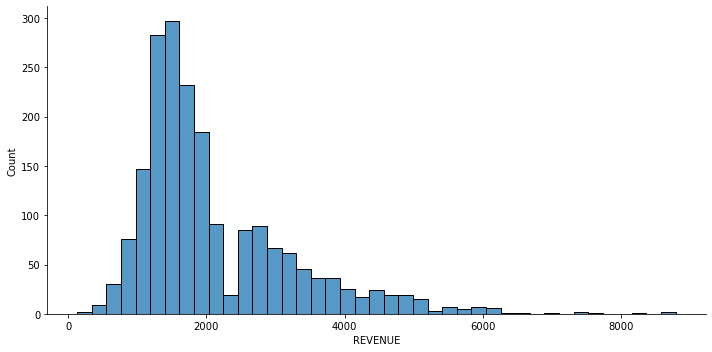

In [9]:
# Plotting the revenue 
sns.displot(data = chef,
            x = 'REVENUE',
            height = 5,
            aspect = 2)

plt.show()

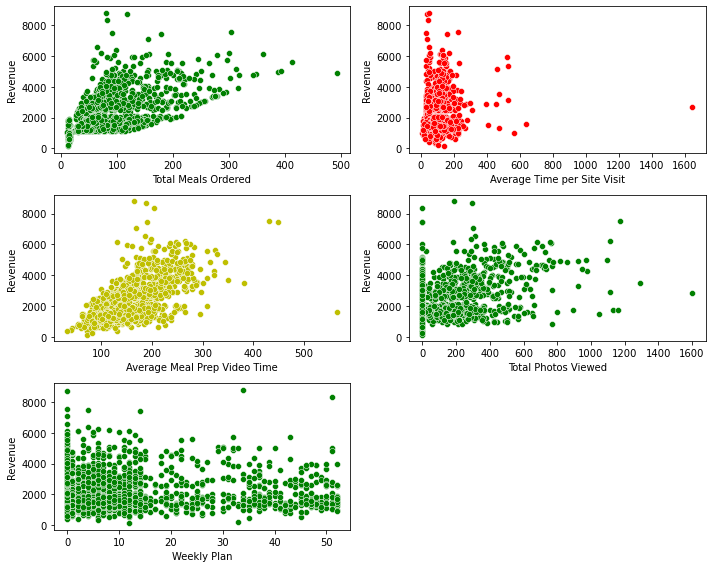

In [10]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Time per Site Visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average Meal Prep Video Time')
plt.ylabel(ylabel = 'Revenue')



########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Photos Viewed')
plt.ylabel(ylabel = 'Revenue')

########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Weekly Plan')
plt.ylabel(ylabel = 'Revenue')



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Chef Scatterplots.png')
plt.show()

<br>

Flagging features with high amount of zeroes

<br>

In [11]:
# counting the number of zeroes
ttlmeals_zeroes     = len(chef['TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] == 0])
avgsitevisit_zeroes = len(chef['AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] == 0])
ttlphotoview_zeroes = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])



## the table below has been coded for you ##

# printing a table of the results
print(f"""
                         No\t\tYes
                       ---------------------
Total Meals Ordered   | {ttlmeals_zeroes}\t\t{len(chef) - ttlmeals_zeroes}
Average Time per Visit| {avgsitevisit_zeroes}\t\t{len(chef) - avgsitevisit_zeroes}
Total Photos Viewed   | {ttlphotoview_zeroes}\t\t{len(chef) - ttlphotoview_zeroes}
""")



                         No		Yes
                       ---------------------
Total Meals Ordered   | 0		1946
Average Time per Visit| 0		1946
Total Photos Viewed   | 1140		806



In [12]:
# These are the log transformations 
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])
chef['log_CROSS_SELL_SUCCESS'] = np.log10(chef['CROSS_SELL_SUCCESS']+1)
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']+1)
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE']+1)
chef['log_MOBILE_NUMBER'] = np.log10(chef['MOBILE_NUMBER']+1)
chef['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(chef['CANCELLATIONS_BEFORE_NOON']+1)
chef['log_CANCELLATIONS_AFTER_NOON'] = np.log10(chef['CANCELLATIONS_AFTER_NOON']+1)
chef['log_TASTES_AND_PREFERENCES'] = np.log10(chef['TASTES_AND_PREFERENCES']+1)
chef['log_MOBILE_LOGINS'] = np.log10(chef['MOBILE_LOGINS']+1)
chef['log_WEEKLY_PLAN'] = np.log10(chef['WEEKLY_PLAN']+1)
chef['log_EARLY_DELIVERIES'] = np.log10(chef['EARLY_DELIVERIES']+1)
chef['log_LATE_DELIVERIES'] = np.log10(chef['LATE_DELIVERIES']+1)
chef['log_PACKAGE_LOCKER'] = np.log10(chef['PACKAGE_LOCKER']+1)
chef['log_REFRIGERATED_LOCKER'] = np.log10(chef['REFRIGERATED_LOCKER']+1)
chef['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef['MASTER_CLASSES_ATTENDED']+1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Based on the table above with 'YES' and 'NO', only Total Photos Viewed has many zero values. 

In [13]:
# dummy variable for viewing photos
chef['viewed_Photo'] = 0

for index, value in chef.iterrows():
    
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'viewed_Photo'] = 1

In [14]:
# Checking the result
chef[['viewed_Photo']].head(n = 5)

,viewed_Photo
0,1
1,0
2,1
3,1
4,0


In [15]:
# Checking correlation of features with revenue

# developing a small correlation matrix
corr = chef.corr().round(2)

# checking the correlations
corr.loc['log_Revenue'].sort_values(ascending = False).head(n=5)

log_Revenue                1.00
REVENUE                    0.95
log_TOTAL_MEALS_ORDERED    0.69
log_AVG_PREP_VID_TIME      0.67
AVG_PREP_VID_TIME          0.65
Name: log_Revenue, dtype: float64

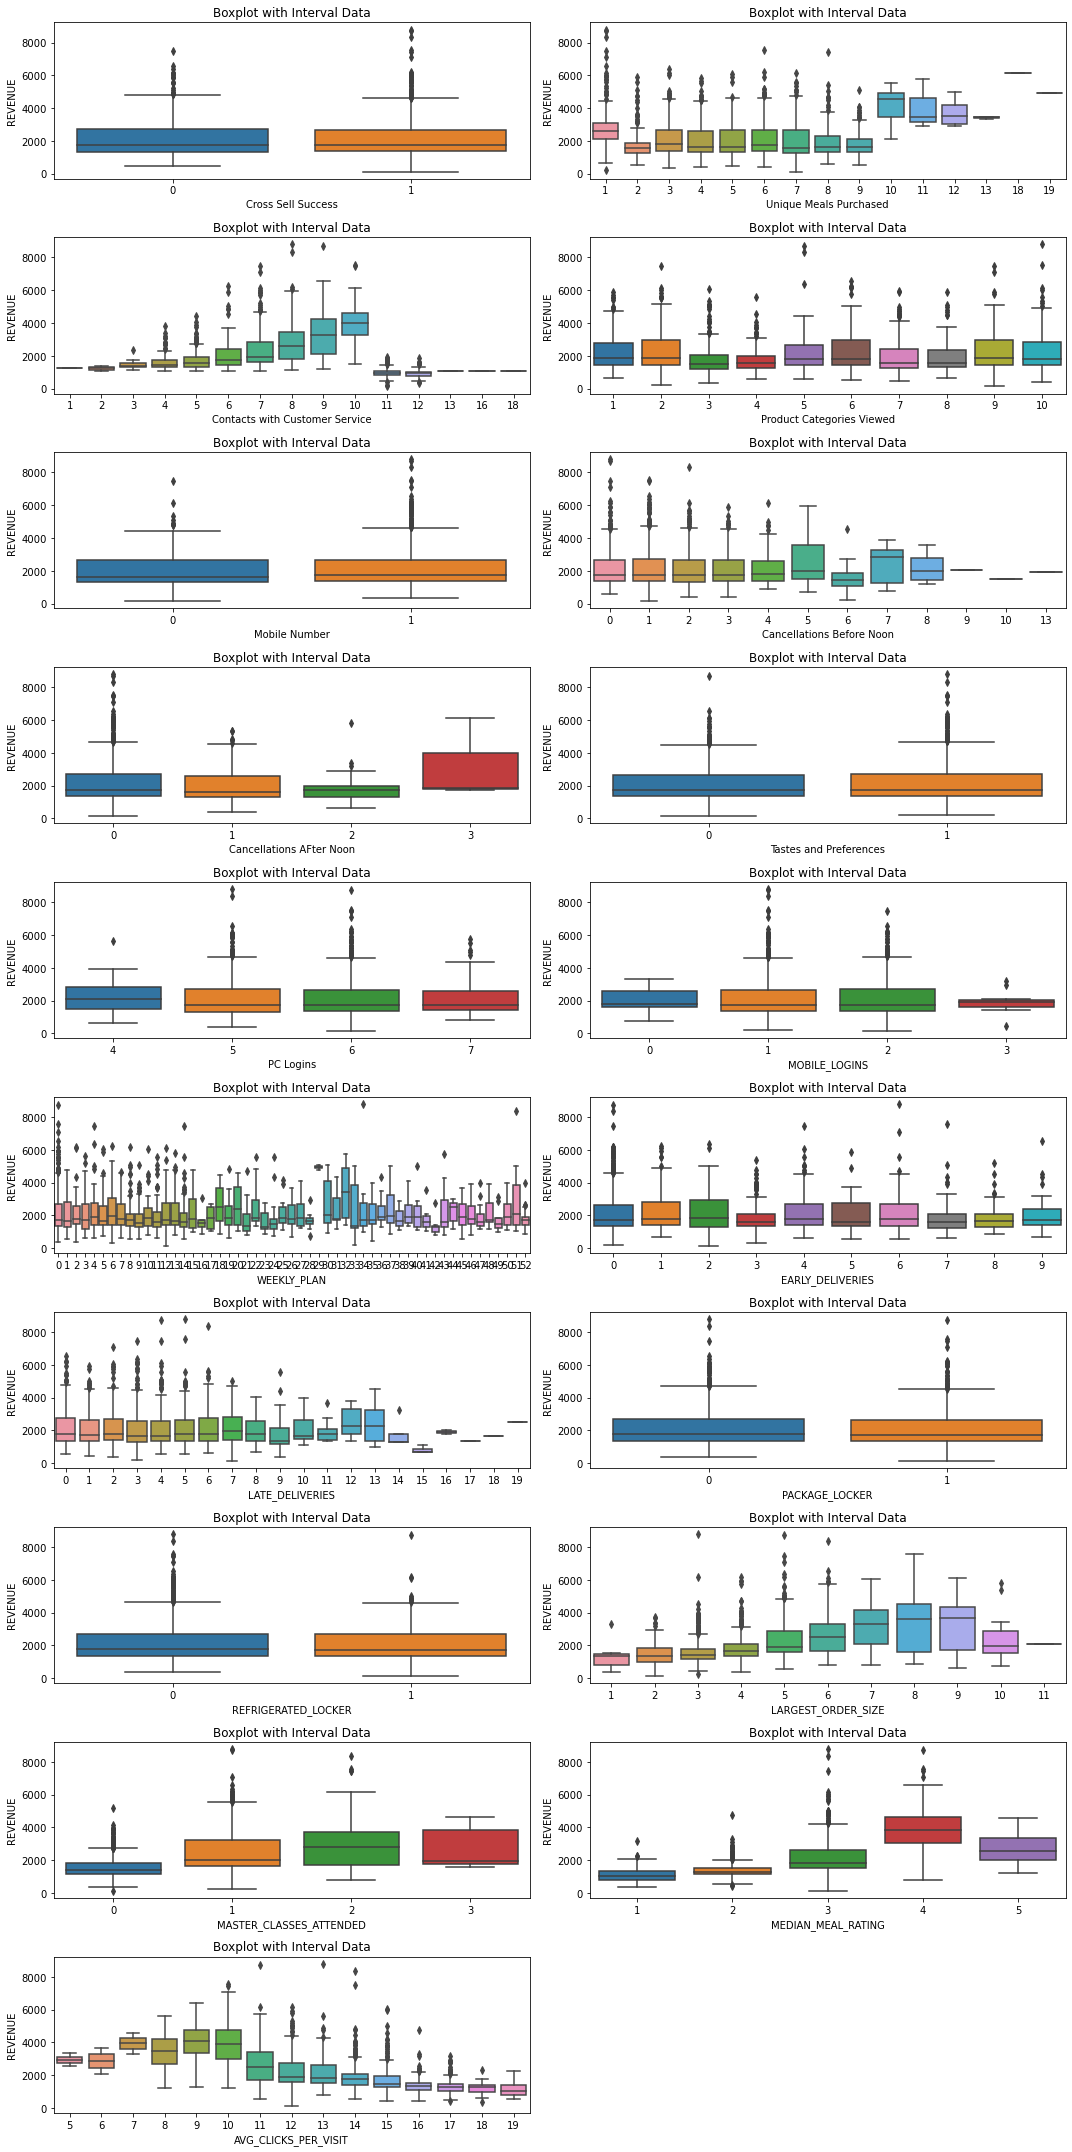

In [16]:
# developing a boxplot for Count/Interval Variables

# setting figure size
fig, ax = plt.subplots(figsize = (15, 30))

#1 CROSS_SELL_SUCCESS
plt.subplot(10, 2, 1)
sns.boxplot(x    = 'CROSS_SELL_SUCCESS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Cross Sell Success')
plt.ylabel(ylabel = 'REVENUE')

#2 UNIQUE_MEALS_PURCH
plt.subplot(10, 2, 2)
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Unique Meals Purchased')
plt.ylabel(ylabel = 'REVENUE')


#3 CONTACTS_W_CUSTOMER_SERVICE 
plt.subplot(10, 2, 3)
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Contacts with Customer Service')
plt.ylabel(ylabel = 'REVENUE')


#4 PRODUCT_CATEGORIES_VIEWED 
plt.subplot(10, 2, 4)
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Product Categories Viewed')
plt.ylabel(ylabel = 'REVENUE')


#5 MOBILE_NUMBER 
plt.subplot(10, 2, 5)
sns.boxplot(x    = 'MOBILE_NUMBER',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Mobile Number')
plt.ylabel(ylabel = 'REVENUE')


#6 CANCELLATIONS_BEFORE_NOON 
plt.subplot(10, 2, 6)
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Cancellations Before Noon')
plt.ylabel(ylabel = 'REVENUE')


#7 CANCELLATIONS_AFTER_NOON 
plt.subplot(10, 2, 7)
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Cancellations AFter Noon')
plt.ylabel(ylabel = 'REVENUE')


#8 TASTES_AND_PREFERENCES 
plt.subplot(10, 2, 8)
sns.boxplot(x    = 'TASTES_AND_PREFERENCES',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Tastes and Preferences')
plt.ylabel(ylabel = 'REVENUE')


#9 PC_LOGINS 
plt.subplot(10, 2, 9)
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC Logins')
plt.ylabel(ylabel = 'REVENUE')


#10 MOBILE_LOGINS
plt.subplot(10, 2, 10)
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


#11 WEEKLY_PLAN
plt.subplot(10, 2, 11)
sns.boxplot(x    = 'WEEKLY_PLAN',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')


#12 EARLY_DELIVERIES
plt.subplot(10, 2, 12)
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


#13 LATE_DELIVERIES
plt.subplot(10, 2, 13)
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


#14 PACKAGE_LOCKER 
plt.subplot(10, 2, 14)
sns.boxplot(x    = 'PACKAGE_LOCKER',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


#15 REFRIGERATED_LOCKER
plt.subplot(10, 2, 15)
sns.boxplot(x    = 'REFRIGERATED_LOCKER',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


#16 LARGEST_ORDER_SIZE
plt.subplot(10, 2, 16)
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


#17 MASTER_CLASSES_ATTENDED
plt.subplot(10, 2, 17)
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


#18 MEDIAN_MEAL_RATING
plt.subplot(10, 2, 18)
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


#19 AVG_CLICKS_PER_VISIT
plt.subplot(10, 2, 19)
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'REVENUE',
            data = chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()

<br>

<h4> Working with Email Addresses</h4>

<br>

In [17]:
# splitting Emails

# placeholder list
placeholder_lst = []

# looping over each email address:
for index, col in chef.iterrows():
    
    #splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame
email_df = pd.DataFrame(placeholder_lst)

# displaying the results
email_df

,0,1
0,abelar.hightower,me.com
1,addam.marbrand,mmm.com
2,addam.velaryon,goldmansacs.com
3,addam,walmart.com
4,addam.osgrey,passport.com
...,...,...
1941,zekko,gmail.com
1942,zharaq.zo.loraq,mmm.com
1943,zhoe.blanetree,yahoo.com
1944,zia.frey,yahoo.com


In [18]:
# concatenating with original DataFrame

# safety measure in case of multiple concatenations
chef = pd.read_excel(file)

# renaming column to concatenate
email_df.columns = ['0', 'email_domain']

# concatenating EMAIL with chef DataFrame
chef = pd.concat([chef, email_df['email_domain']], axis=1)

# printing value counts of email_domain
chef.loc[ : , 'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
mcdonalds.com        28
merck.com            28
apple.com            27
nike.com             27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
caterpillar.com      22
mmm.com              22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

In [19]:
# Aggregating email domains into personal and professional groups

# email domain types
personal_email_domains = ['gmail.com', 'protonmail.com', 'yahoo.com']
professional_email_domains = ['amex.com', 'mcdonalds.com', 'cocacola.com', 'merck.com', 'jnj.com', 'nike.com', 'apple.com', 'ibm.com', 'ge.org', 'dupont.com', 'microsoft.com', 'chevron.com', 'intel.com', 'homedepot.com', 'cisco.com', 'goldmansacs.com', 'unitedtech.com', 'jpmorgan.com', 'visa.com', 'pfizer.com', 'walmart.com', 'disney.com', 'verizon.com', 'caterpillar.com', 'mmm.com', 'pg.com', 'boeing.com', 'exxon.com', 'unitedhealth.com', 'travelers.com',]
junk_email_domains = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in chef['email_domain']:
    if domain in personal_email_domains:
        placeholder_lst.append('personal')
        
    elif domain in professional_email_domains:
        placeholder_lst.append('professional')
        
    elif domain in junk_email_domains:
        placeholder_lst.append('junk')
        
    else:
        print('Unknown')
        
# concatenating with original DataFrame
chef['domain_group'] = pd.Series(data=placeholder_lst)

# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [20]:
# One hot encoding categorical variables
one_hot_email_domain = pd.get_dummies(chef['email_domain'])
one_hot_domain_group = pd.get_dummies(chef['domain_group'])


# dropping categorical variables after they've been encoded
chef = chef.drop('email_domain', axis = 1)
chef = chef.drop('domain_group', axis = 1)

# joining codings together
chef = chef.join([one_hot_email_domain, one_hot_domain_group])


<br>

<h4> Printing variables </h4>

<br>

In [21]:
# formatting each explanatory variable for statsmodels
for val in chef:
    
    print(f""" '{val}', """)

 'REVENUE', 
 'CROSS_SELL_SUCCESS', 
 'NAME', 
 'EMAIL', 
 'FIRST_NAME', 
 'FAMILY_NAME', 
 'TOTAL_MEALS_ORDERED', 
 'UNIQUE_MEALS_PURCH', 
 'CONTACTS_W_CUSTOMER_SERVICE', 
 'PRODUCT_CATEGORIES_VIEWED', 
 'AVG_TIME_PER_SITE_VISIT', 
 'MOBILE_NUMBER', 
 'CANCELLATIONS_BEFORE_NOON', 
 'CANCELLATIONS_AFTER_NOON', 
 'TASTES_AND_PREFERENCES', 
 'PC_LOGINS', 
 'MOBILE_LOGINS', 
 'WEEKLY_PLAN', 
 'EARLY_DELIVERIES', 
 'LATE_DELIVERIES', 
 'PACKAGE_LOCKER', 
 'REFRIGERATED_LOCKER', 
 'AVG_PREP_VID_TIME', 
 'LARGEST_ORDER_SIZE', 
 'MASTER_CLASSES_ATTENDED', 
 'MEDIAN_MEAL_RATING', 
 'AVG_CLICKS_PER_VISIT', 
 'TOTAL_PHOTOS_VIEWED', 
 'amex.com', 
 'aol.com', 
 'apple.com', 
 'boeing.com', 
 'caterpillar.com', 
 'chevron.com', 
 'cisco.com', 
 'cocacola.com', 
 'disney.com', 
 'dupont.com', 
 'exxon.com', 
 'ge.org', 
 'gmail.com', 
 'goldmansacs.com', 
 'homedepot.com', 
 'hotmail.com', 
 'ibm.com', 
 'intel.com', 
 'jnj.com', 
 'jpmorgan.com', 
 'live.com', 
 'mcdonalds.com', 
 'me.com', 
 'mer

In [22]:
# log transforming REVENUE and saving it to the dataset
chef['log_Revenue'] = np.log10(chef['REVENUE'])

# These are the log transformations 
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])
chef['log_CROSS_SELL_SUCCESS'] = np.log10(chef['CROSS_SELL_SUCCESS']+1)
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']+1)
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE']+1)
chef['log_MOBILE_NUMBER'] = np.log10(chef['MOBILE_NUMBER']+1)
chef['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(chef['CANCELLATIONS_BEFORE_NOON']+1)
chef['log_CANCELLATIONS_AFTER_NOON'] = np.log10(chef['CANCELLATIONS_AFTER_NOON']+1)
chef['log_TASTES_AND_PREFERENCES'] = np.log10(chef['TASTES_AND_PREFERENCES']+1)
chef['log_MOBILE_LOGINS'] = np.log10(chef['MOBILE_LOGINS']+1)
chef['log_WEEKLY_PLAN'] = np.log10(chef['WEEKLY_PLAN']+1)
chef['log_EARLY_DELIVERIES'] = np.log10(chef['EARLY_DELIVERIES']+1)
chef['log_LATE_DELIVERIES'] = np.log10(chef['LATE_DELIVERIES']+1)
chef['log_PACKAGE_LOCKER'] = np.log10(chef['PACKAGE_LOCKER']+1)
chef['log_REFRIGERATED_LOCKER'] = np.log10(chef['REFRIGERATED_LOCKER']+1)
chef['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef['MASTER_CLASSES_ATTENDED']+1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>
<h4>Training and Testing Sets</h4><br>



In [23]:
# Checking correlation of features with revenue

# developing a small correlation matrix
corr = chef.corr().round(2)

# checking the correlations
corr.loc['log_Revenue'].sort_values(ascending = False).head(n=5)

log_Revenue                1.00
REVENUE                    0.95
log_TOTAL_MEALS_ORDERED    0.69
log_AVG_PREP_VID_TIME      0.67
AVG_PREP_VID_TIME          0.65
Name: log_Revenue, dtype: float64

In [24]:
# importing libraries
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.linear_model import Lasso # linear model
from sklearn.linear_model import ARDRegression # ARD Regression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# preparing explanatory variable data
chef_data = chef.drop(['REVENUE', 'log_Revenue'], axis = 1)

# preparing response variables
chef_target = chef.loc[ : , 'log_Revenue']

# preparing training and test sets
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)

In [25]:
# declaring set of x-variables with OLS p-value x-dataset
x_variables = ['log_AVG_PREP_VID_TIME', 'log_TOTAL_MEALS_ORDERED', 'log_MASTER_CLASSES_ATTENDED',
               'log_LARGEST_ORDER_SIZE', 'log_UNIQUE_MEALS_PURCH',          
               'log_CANCELLATIONS_AFTER_NOON', 'log_AVG_TIME_PER_SITE_VISIT',              
               'log_TASTES_AND_PREFERENCES', 'log_PRODUCT_CATEGORIES_VIEWED',
               'log_WEEKLY_PLAN', 'log_TOTAL_PHOTOS_VIEWED',
               'log_CONTACTS_W_CUSTOMER_SERVICE',               
               'AVG_CLICKS_PER_VISIT',
               'PRODUCT_CATEGORIES_VIEWED', 'CROSS_SELL_SUCCESS',
               'CANCELLATIONS_AFTER_NOON', 'UNIQUE_MEALS_PURCH',
               'AVG_PREP_VID_TIME',
               'CONTACTS_W_CUSTOMER_SERVICE', 
               'MEDIAN_MEAL_RATING',
               'exxon.com', 'intel.com', 'ge.org', 'chevron.com',
               'msn.com', 'hotmail.com', 'goldmansacs.com',
               'homedepot.com', 'unitedhealth.com', 'pfizer.com']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
log_MASTER_CLASSES_ATTENDED +
log_LARGEST_ORDER_SIZE +
log_UNIQUE_MEALS_PURCH +
log_CANCELLATIONS_AFTER_NOON +
log_AVG_TIME_PER_SITE_VISIT +
log_TASTES_AND_PREFERENCES +
log_PRODUCT_CATEGORIES_VIEWED +
log_WEEKLY_PLAN +
log_TOTAL_PHOTOS_VIEWED +
log_CONTACTS_W_CUSTOMER_SERVICE +
AVG_CLICKS_PER_VISIT +
PRODUCT_CATEGORIES_VIEWED +
CROSS_SELL_SUCCESS +
CANCELLATIONS_AFTER_NOON +
UNIQUE_MEALS_PURCH +
AVG_PREP_VID_TIME +
CONTACTS_W_CUSTOMER_SERVICE +
MEDIAN_MEAL_RATING +
exxon.com +
intel.com +
ge.org +
chevron.com +
msn.com +
hotmail.com +
goldmansacs.com +
homedepot.com +
unitedhealth.com +
pfizer.com +


In [26]:
# building a base model

# INSTANTIATING a model type
lm_first = smf.ols(formula = """  log_Revenue ~    log_AVG_PREP_VID_TIME +
                                                    log_TOTAL_MEALS_ORDERED +
                                                    log_MASTER_CLASSES_ATTENDED +
                                                    log_LARGEST_ORDER_SIZE +
                                                    log_UNIQUE_MEALS_PURCH +
                                                    log_CANCELLATIONS_AFTER_NOON +
                                                    log_AVG_TIME_PER_SITE_VISIT +
                                                    log_TASTES_AND_PREFERENCES +
                                                    log_PRODUCT_CATEGORIES_VIEWED +
                                                    log_WEEKLY_PLAN +
                                                    log_TOTAL_PHOTOS_VIEWED +
                                                    log_CONTACTS_W_CUSTOMER_SERVICE +
                                                    AVG_CLICKS_PER_VISIT +
                                                    PRODUCT_CATEGORIES_VIEWED +
                                                    CROSS_SELL_SUCCESS +
                                                    CANCELLATIONS_AFTER_NOON +
                                                    UNIQUE_MEALS_PURCH +
                                                    AVG_PREP_VID_TIME +
                                                    CONTACTS_W_CUSTOMER_SERVICE +
                                                    MEDIAN_MEAL_RATING""",
                                     data = chef)


# telling Python to FIT the data to the blueprint
results = lm_first.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     316.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:23:56   Log-Likelihood:                 1675.5
No. Observations:                1946   AIC:                            -3309.
Df Residuals:                    1925   BIC:                            -3192.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [27]:
# applying modeling scikit-learn

# preparing x-variables from the OLS model
ols_data = chef[x_variables]

# preparing response variable
chef_target = chef['log_Revenue']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,      # y-variable
            test_size = 0.25,
            random_state = 219)

<h4> Trying different models using scikit-learn.</h4><br>

4. INSTANTIATE a <strong>Model( )</strong> object
5. FIT the training data to the model object
6. PREDICT using the testing data
7. SCORE your results

In [28]:
# Linear Regression Model

# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4)) # using R-square
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))   # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7603
OLS Testing Score  : 0.7824
OLS Train-Test Gap : 0.0221
